1.导入带回归数据

In [1]:
import numpy as np
import pandas as pd

In [2]:
with open('data_impurities.csv', encoding = 'UTF-8') as f:
    df = pd.read_csv(f, index_col = 0)  #index_col=0 告诉第一列是索引
df

,Fe,Co,Ni,Cu,Ru,Rh,Pd,Ag,Ir,Pt,Au
Fe,-0.92,0.05,-0.20,-0.13,-0.29,-0.54,-1.24,-0.83,-0.36,-1.09,-1.42
Co,0.01,-1.17,-0.28,-0.16,-0.24,-0.58,-1.37,-0.91,-0.36,-1.19,-1.56
Ni,0.09,0.19,-1.29,0.19,-0.14,-0.31,-0.97,-0.53,-0.14,-0.80,-1.13
Cu,0.56,0.60,0.27,-2.67,0.58,0.32,-0.64,-0.70,0.58,-0.33,-1.09
Ru,0.21,0.26,0.01,0.12,-1.41,-0.17,-0.82,-0.27,0.02,-0.62,-0.84
Rh,0.24,0.34,0.16,0.44,0.04,-1.73,-0.54,0.07,0.17,-0.35,-0.49
Pd,0.37,0.54,0.50,0.94,0.24,0.36,-1.83,0.59,0.53,0.19,0.17
Ag,0.72,0.84,0.67,0.47,0.84,0.86,0.14,-4.30,1.14,0.50,-0.15
Ir,0.21,0.27,0.05,0.21,0.09,-0.15,-0.73,-0.13,-2.11,-0.56,-0.74
Pt,0.33,0.48,0.40,0.72,0.14,0.23,-0.17,0.44,0.38,-2.25,-0.05


In [3]:
df.loc['Co', 'Ni']  #查看某一个数据

-0.28

In [4]:
df.iloc[1:5,2]

Co   -0.28
Ni   -1.29
Cu    0.27
Ru    0.01
Name: Ni, dtype: float64

In [5]:
df.iloc[1,] #查看整行

Fe    0.01
Co   -1.17
Ni   -0.28
Cu   -0.16
Ru   -0.24
Rh   -0.58
Pd   -1.37
Ag   -0.91
Ir   -0.36
Pt   -1.19
Au   -1.56
Name: Co, dtype: float64

1.2. 将d带中心数据从相对值改为绝对值 

In [6]:
for i in df.index:  #对行遍历
    for j in df.columns:  #对列遍历
        if(i == 'Fe' and j == 'Fe'):
            print('host ' + i + ',guest ' + j + ',val ' + str(df.loc[i, j]))  #输出

host Fe,guest Fe,val -0.92


In [7]:
for i in df.index:  #对行遍历
    for j in df.columns:  #对列遍历
        if(i != j):
            df.loc[i,j] += df.loc[i,i]
df

,Fe,Co,Ni,Cu,Ru,Rh,Pd,Ag,Ir,Pt,Au
Fe,-0.92,-0.87,-1.12,-1.05,-1.21,-1.46,-2.16,-1.75,-1.28,-2.01,-2.34
Co,-1.16,-1.17,-1.45,-1.33,-1.41,-1.75,-2.54,-2.08,-1.53,-2.36,-2.73
Ni,-1.20,-1.10,-1.29,-1.10,-1.43,-1.60,-2.26,-1.82,-1.43,-2.09,-2.42
Cu,-2.11,-2.07,-2.40,-2.67,-2.09,-2.35,-3.31,-3.37,-2.09,-3.00,-3.76
Ru,-1.20,-1.15,-1.40,-1.29,-1.41,-1.58,-2.23,-1.68,-1.39,-2.03,-2.25
Rh,-1.49,-1.39,-1.57,-1.29,-1.69,-1.73,-2.27,-1.66,-1.56,-2.08,-2.22
Pd,-1.46,-1.29,-1.33,-0.89,-1.59,-1.47,-1.83,-1.24,-1.30,-1.64,-1.66
Ag,-3.58,-3.46,-3.63,-3.83,-3.46,-3.44,-4.16,-4.30,-3.16,-3.80,-4.45
Ir,-1.90,-1.84,-2.06,-1.90,-2.02,-2.26,-2.84,-2.24,-2.11,-2.67,-2.85
Pt,-1.92,-1.77,-1.85,-1.53,-2.11,-2.02,-2.42,-1.81,-1.87,-2.25,-2.30


2.导入描述符数据 

In [8]:
with open('data_impurities_features.csv', encoding = 'UTF-8') as f:
    feat = pd.read_csv(f, index_col = 0)
feat

,name,group,bulk wigner-seitz radius,atomic number,atomic mass,period,electronegativity,Iionization energy(eV),H_fus,density
Fe,Iron,8,2.66,26,55.84500,4,1.83,7.9024,247.3,7.87
Co,Cobalt,9,2.62,27,58.93320,4,1.88,7.8810,272.5,8.86
Ni,Nickel,10,2.60,28,58.69340,4,1.91,7.6398,290.3,8.90
Cu,Copper,11,2.67,29,63.54600,4,1.90,7.7264,203.5,8.96
Ru,Ruthenium,8,2.79,44,101.07000,5,2.20,7.3605,381.8,12.10
Rh,Rhodium,9,2.81,45,102.90550,5,2.28,7.4589,258.4,12.40
Pd,Palladium,10,2.87,46,106.42000,5,2.20,8.3369,157.3,12.00
Ag,Silver,11,3.01,47,107.86820,5,1.93,7.5762,104.6,10.50
Ir,Iridium,9,2.84,77,192.21700,6,2.20,8.9670,213.9,22.50
Pt,Platinum,10,2.90,78,195.07800,6,2.20,8.9588,113.6,21.50


In [9]:
feat.head()  #head()默认显示前五行，括号内可以指定显示多少行

,name,group,bulk wigner-seitz radius,atomic number,atomic mass,period,electronegativity,Iionization energy(eV),H_fus,density
Fe,Iron,8,2.66,26,55.8450,4,1.83,7.9024,247.3,7.87
Co,Cobalt,9,2.62,27,58.9332,4,1.88,7.8810,272.5,8.86
Ni,Nickel,10,2.60,28,58.6934,4,1.91,7.6398,290.3,8.90
Cu,Copper,11,2.67,29,63.5460,4,1.90,7.7264,203.5,8.96
Ru,Ruthenium,8,2.79,44,101.0700,5,2.20,7.3605,381.8,12.10


In [10]:
feat.iloc[1,]

name                         Cobalt
group                             9
bulk wigner-seitz radius       2.62
atomic number                    27
atomic mass                 58.9332
period                            4
electronegativity              1.88
Iionization energy(eV)        7.881
H_fus                         272.5
density                        8.86
Name: Co, dtype: object

In [11]:
feat.loc['Co']

name                         Cobalt
group                             9
bulk wigner-seitz radius       2.62
atomic number                    27
atomic mass                 58.9332
period                            4
electronegativity              1.88
Iionization energy(eV)        7.881
H_fus                         272.5
density                        8.86
Name: Co, dtype: object

In [12]:
#删掉内容不需要的内容
feat = feat.drop('name', axis = 'columns')

In [13]:
feat

,group,bulk wigner-seitz radius,atomic number,atomic mass,period,electronegativity,Iionization energy(eV),H_fus,density
Fe,8,2.66,26,55.84500,4,1.83,7.9024,247.3,7.87
Co,9,2.62,27,58.93320,4,1.88,7.8810,272.5,8.86
Ni,10,2.60,28,58.69340,4,1.91,7.6398,290.3,8.90
Cu,11,2.67,29,63.54600,4,1.90,7.7264,203.5,8.96
Ru,8,2.79,44,101.07000,5,2.20,7.3605,381.8,12.10
Rh,9,2.81,45,102.90550,5,2.28,7.4589,258.4,12.40
Pd,10,2.87,46,106.42000,5,2.20,8.3369,157.3,12.00
Ag,11,3.01,47,107.86820,5,1.93,7.5762,104.6,10.50
Ir,9,2.84,77,192.21700,6,2.20,8.9670,213.9,22.50
Pt,10,2.90,78,195.07800,6,2.20,8.9588,113.6,21.50


3.设施输入输出

In [14]:
x = list()   #简历空列表
y = list()   
for i in df.index:
    for j in df.columns:
        vec_i = feat.loc[i].to_numpy()   #把这一行的数据转成数组
        vec_j = feat.loc[j].to_numpy()
        x_val = np.concatenate((vec_i, vec_j))  #把两个数组拼接起来，首尾相连
        y_val = df.loc[i,j]
        x.append(x_val)
        y.append(y_val)
        if i == 'Fe' and j == 'Co':
            print('host ' + i + ', guest ' + j + ', input = ', str(x_val)\
                  + ', output = ' + str(y_val))      #反斜杠可以写在print函数里，用于把代码分行写。

host Fe, guest Co, input =  [  8.       2.66    26.      55.845    4.       1.83     7.9024 247.3
   7.87     9.       2.62    27.      58.9332   4.       1.88     7.881
 272.5      8.86  ], output = -0.87


In [15]:
X = np.array(x)   #把列表转成数组
y = np.array(y)
X.shape, y.shape

((121, 18), (121,))

4.线性回归

In [16]:
#先把数据打乱，再切割出训练集和测试机,用shuffle来做打乱
from sklearn.utils import shuffle

a = np.array(range(10))
print(a)
a = shuffle(a)
print(a)

[0 1 2 3 4 5 6 7 8 9]
[8 5 9 2 4 0 7 3 1 6]


In [17]:
X_r, y_r = shuffle(X, y)  #X，y同时打乱，X和y的对应关系是不变的
X_train, y_train = X_r[:-30,:], y_r[:-30]
X_test, y_test = X_r[-30:,:], y_r[-30:]

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

4.2可视化

Text(0, 0.5, 'prediction')

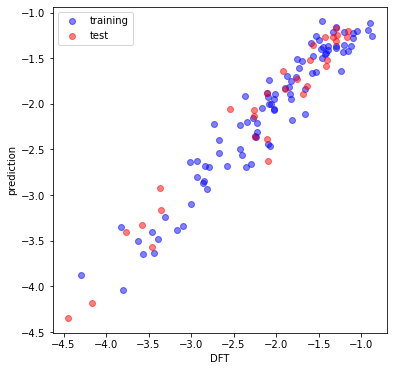

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 6))
plt.scatter(y_train, y_pred_train_lr, alpha = 0.5, color = 'b', label = 'training')  #alpha设置透明度
plt.scatter(y_test, y_pred_test_lr, alpha = 0.5, color = 'r', label = 'test')
plt.legend()
plt.xlabel('DFT')
plt.ylabel('prediction')

4.3交叉验证

In [21]:
from sklearn.metrics import mean_squared_error #引用均方差
rmse_tr_lr = mean_squared_error(y_train, y_pred_train_lr, squared = False) #squared = False 是表示对均方差求根，及得到均方根误差
rmse_te_lr = mean_squared_error(y_test, y_pred_test_lr)
print('RMSE(training)%.3f'%rmse_tr_lr)
print('RMSE(test)%.3f'%rmse_te_lr)

RMSE(training)0.211
RMSE(test)0.049


In [22]:
from sklearn.model_selection import cross_val_score
r2_scores_lr = cross_val_score(lr, X, y, scoring = 'r2', cv = 5)  #scoring = 'r2' 决定系数的打分方法
rmse_scores_lr = cross_val_score(lr, X, y, scoring = 'neg_root_mean_squared_error', cv = 5) #scoring = 'neg_root_mean_squared_error' RMSE打分方法

print('cv result:')
print('Fold: %i, mean R2: %.3f' %(len(r2_scores_lr), r2_scores_lr.mean()))  #cv=5，所以每次验证都会得到r2,最后得到一个数组。所以后面还有一个求平均
print('Fold: %i, mean RMSE: %.3f' %(len(rmse_scores_lr), -rmse_scores_lr.mean()))


cv result:
Fold: 5, mean R2: -57.377
Fold: 5, mean RMSE: 2.539


先打乱再交叉验证


‘crossvalidation = KFold(n_splits = 10, shuffle = True)’ 这一段代码的含义：
K 折交叉验证是一种用于评估机器学习模型性能的技术。它涉及将数据集随机划分为大小大致相等的 k 个“折叠”（或子集），然后使用其中的 k-1 个折叠来训练模型，同时在剩余的折叠上对其进行评估。然后将此过程重复 k 次，每次迭代中使用不同的折叠作为评估集。所有 k 次迭代的平均性能用作模型性能的估计。

这段代码中传递给KFold构造函数的具体参数是：

n_splits = 10：这指定数据集应分为 10 折。
shuffle = True：这告诉 KFold 类在将数据拆分为折叠之前对数据进行洗牌，这有助于减少任何一个折叠不能很好地代表整个数据集的可能性。

In [24]:
from sklearn.model_selection import cross_val_score, KFold

crossvalidation = KFold(n_splits = 10, shuffle = True)  #打乱分割方法
r2_scores_lr = cross_val_score(lr, X, y, scoring = 'r2', cv = crossvalidation)  #scoring = 'r2' 决定系数的打分方法
rmse_scores_lr = cross_val_score(lr, X, y, scoring = 'neg_root_mean_squared_error', cv = crossvalidation) #scoring = 'neg_root_mean_squared_error' RMSE打分方法

print('cv result:')
print('Fold: %i, mean R2: %.3f' %(len(r2_scores_lr), r2_scores_lr.mean()))  #cv=5，所以每次验证都会得到r2,最后得到一个数组。所以后面还有一个求平均
print('Fold: %i, mean RMSE: %.3f' %(len(rmse_scores_lr), -rmse_scores_lr.mean()))


cv result:
Fold: 10, mean R2: 0.872
Fold: 10, mean RMSE: 0.245
